<a href="https://colab.research.google.com/github/mezgoodle/ad_labs/blob/master/docs/lab8/lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вступ

Написати програму, яка навчає та тестує модель, що виконує задачу бінарної класифікації відповідно до варіанту, оцінити модель за допомогою відповідних метрик та спробувати її покращити.

Варіант 7: lab2/Birthweight.csv. Класифікувати дітей на тих, що мають низьку вагу, та інших, використовуючи будь-які незалежні змінні.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, zero_one_loss, classification_report

# Дані

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/mezgoodle/ad_labs/master/data/Birthweight.csv')
df.head(5)

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
0,1360,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0
1,1016,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0
2,462,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1
3,1187,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0
4,553,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           42 non-null     int64  
 1   Length       42 non-null     int64  
 2   Birthweight  42 non-null     float64
 3   Headcirc     42 non-null     int64  
 4   Gestation    42 non-null     int64  
 5   smoker       42 non-null     int64  
 6   mage         42 non-null     int64  
 7   mnocig       42 non-null     int64  
 8   mheight      42 non-null     int64  
 9   mppwt        42 non-null     int64  
 10  fage         42 non-null     int64  
 11  fedyrs       42 non-null     int64  
 12  fnocig       42 non-null     int64  
 13  fheight      42 non-null     int64  
 14  lowbwt       42 non-null     int64  
 15  mage35       42 non-null     int64  
dtypes: float64(1), int64(15)
memory usage: 5.4 KB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,42.0,894.071429,467.616186,27.00,537.25,821.000,1269.5000,1764.00
Length,42.0,51.333333,2.935624,43.00,50.00,52.000,53.0000,58.00
Birthweight,42.0,3.312857,0.603895,1.92,2.94,3.295,3.6475,4.57
Headcirc,42.0,34.595238,2.399792,30.00,33.00,34.000,36.0000,39.00
Gestation,42.0,39.190476,2.643336,33.00,38.00,39.500,41.0000,45.00
smoker,42.0,0.523810,0.505487,0.00,0.00,1.000,1.0000,1.00
mage,42.0,25.547619,5.666342,18.00,20.25,24.000,29.0000,41.00
mnocig,42.0,9.428571,12.511737,0.00,0.00,4.500,15.7500,50.00
mheight,42.0,164.452381,6.504041,149.00,161.00,164.500,169.5000,181.00
mppwt,42.0,57.500000,7.198408,45.00,52.25,57.000,62.0000,78.00


In [15]:
df_x = df.drop(columns='lowbwt')
df_y = df.pop('lowbwt')

In [17]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=0,stratify=df_y)

In [18]:
pipeline = Pipeline([('scale', StandardScaler()),('lr', LogisticRegression(class_weight='balanced', random_state=0))])

In [19]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('lr',
                 LogisticRegression(class_weight='balanced', random_state=0))])

In [20]:
pred = pipeline.predict(x_test)

Матриця невідповідностей

|  | Істинна належність | Позитивний | Негативний |
| --- | --- |  |  |
| Результати класифікації |  |  |  |
| Позитивний |  | TP | FP |
| Негативний |  | TN | FN |

де: 
* TP (True Positive) — кількість правильно визначених «позитивних» об’єктів;
* FP (False Positive) — кількість «негативних» об’єктів, які хибно класифіковані як «позитивні»;
* FN (False Negative) — кількість «позитивних» об’єктів, які хибно класифіковані як «негативні»; 
* TN (True Negative) — кількість правильно визначених «негативних» об’єктів.

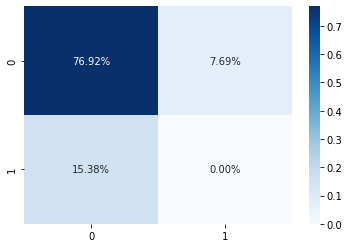

In [26]:
matrix = confusion_matrix(y_test, pred)
sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%', cmap='Blues')

In [27]:
pipeline.score(x_test, y_test)

0.7692307692307693

In [30]:
zero_one_loss(y_test, pred)

0.23076923076923073

In [34]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.00      0.00      0.00         2

    accuracy                           0.77        13
   macro avg       0.42      0.45      0.43        13
weighted avg       0.71      0.77      0.74        13

